In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/content/Ads_CTR_Optimisation.csv')

In [3]:
import math
N = 1000
# we can change this value to see the least number of n required by algorithm to get the correct answer
# in this case, this can be considered 1000
d = 10
ads_selected = []
# sequence at which each ad is selected, which is not 0,1,2... it will be randomly selected
# but in the first step, 0,1,2... will be followed first

#number of times ad i was selected upto round N, suppose ad 3 is selected so 3rd will become +1 and so on
number_of_selections = [0]*d 

#sums of rewards od ith ad upto round n
sums_of_rewards = [0]*d 

total = 0

for n in range(0,N): # to iterate through rows
  # we will find UCB of each ad, and then compare to get maximum upper bound. for this ad is initialised
  ad = 0
  # will find max upper bound, first initialised as 0, will change when we find UCB of different ads
  max_upper_bound = 0

  for i in range(0,d): # to iterate through columns
    # in first step, we dont have any selections, so Ni will be zero, so we need if else
    if(number_of_selections[i]>0): # i is the index of ad we are dealing with 
    # if the index of that was previously selected, we will have numberOfSelections more than 0
      #now we are dealing with situation when that ad wa salready selected previously

      average = sums_of_rewards[i]/number_of_selections[i]
      delta = math.sqrt(3/2 * math.log(n+1)/ number_of_selections[i]) 

      #n starts from 0, so we add +1 so that log doesnt go to infinity

      upper = average + delta

    else: 
       # here we need to apply a trick to make sure we select all 10 ads first 10 rounds and then run UCB algo so that Ni is not zero
       # to do this, we will have a max upper bound to maximum value
      upper = 1e400

    if(max_upper_bound < upper):
      max_upper_bound = upper # whole purpose of this is to determine which ad to select next
      ad = i #ad with highest upper bound
      
       #to make sure we select ad with highest UCB
  ads_selected.append(ad) # ad is selected with this sequence
  number_of_selections[ad] += 1 # how many times that particular ad is selected
  sums_of_rewards[ad] += dataset.values[n,ad] # reward we got when we chose that ad
  total = total + dataset.values[n, ad]




In [4]:
print(ads_selected)
# this will be equal to N, since that is the number of users


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 6, 6, 7, 7, 7, 0, 6, 7, 4, 1, 1, 1, 2, 2, 2, 3, 5, 9, 2, 8, 7, 0, 1, 6, 4, 7, 2, 8, 3, 5, 9, 9, 9, 9, 4, 0, 1, 

In [5]:
print(number_of_selections)
# sum of this will always be equal to N

[109, 79, 53, 68, 287, 53, 86, 140, 64, 61]


In [6]:
print(sums_of_rewards)
# this will be the sum of rewards collected by each ad

[17, 8, 1, 5, 79, 1, 10, 27, 4, 3]


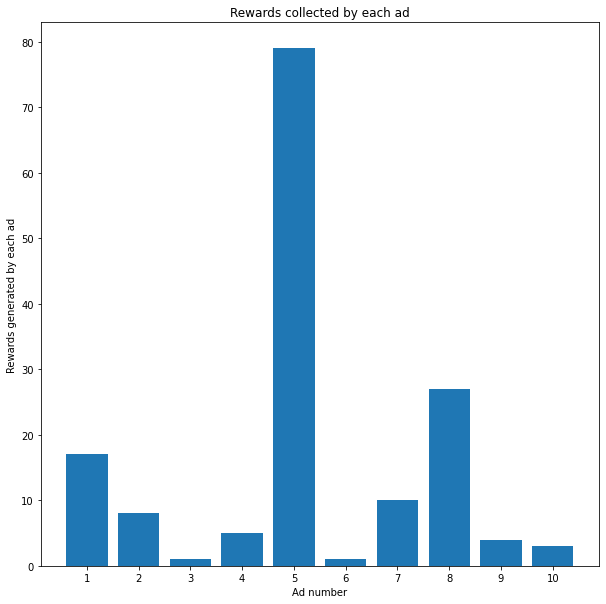

In [7]:
plt.figure(figsize=(10,10))
plt.bar(['1','2','3','4','5', '6', '7', '8', '9', '10'],sums_of_rewards)
plt.title('Rewards collected by each ad')
plt.xlabel('Ad number')
plt.ylabel('Rewards generated by each ad')
plt.show()


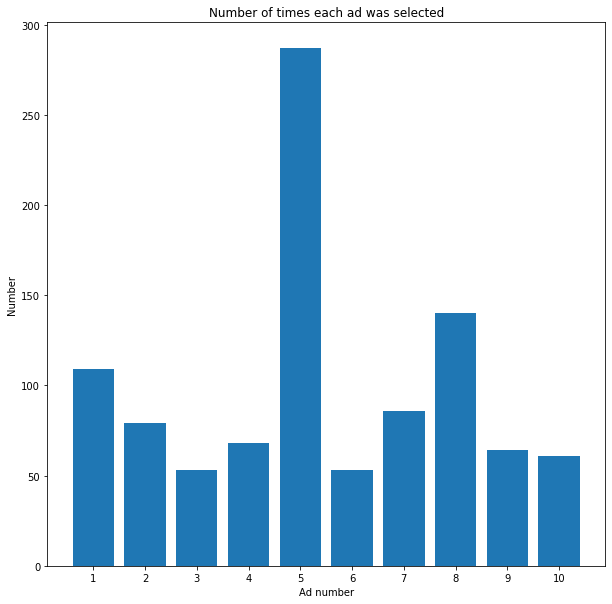

In [8]:
plt.figure(figsize=(10,10))
plt.bar(['1','2','3','4','5', '6', '7', '8', '9', '10'],number_of_selections)
plt.title('Number of times each ad was selected')
plt.xlabel('Ad number')
plt.ylabel('Number')
plt.show()

In conclusion, Ad number 5 was the ad which generated the most clicks by the user. This ad can easily be substituted with terms like machines or photos etc

Conclusion generated by me in the above algorithm - 
- ads_selected  
- total 

these variables are not very important to implement UCB.  Main algorithm uses only 4 variables - N, d, number_of_selection(*Ni(n))* and sums_of_rewards (*Ri(n)*) which is used in the algo

Second conclusion - we can also use ads_selected to find the ad which was selected highest number of time by plotting a histogram of it. 

